In [36]:
# Step 1: Import & initial preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 1) Change this path to where your dataset file is (e.g., "housing.csv" or "train.csv")
DATA_PATH = "/content/Housing.csv"   # <-- change filename if needed


In [37]:
# 2) Load
df = pd.read_csv(DATA_PATH)

# 3) Quick look
print("Shape:", df.shape)
display(df.head(5))

Shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [38]:

# 4) Info & basic stats
print("\n--- DataFrame info ---")
display(df.info())

print("\n--- Numeric summary ---")
display(df.describe().T)

print("\n--- Categorical summary (top values) ---")
display(df.describe(include='object').T)


--- DataFrame info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None


--- Numeric summary ---


,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0



--- Categorical summary (top values) ---


,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


In [39]:

# 5) Missing values (sorted)
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_df = pd.concat([missing, missing_percent], axis=1)
missing_df.columns = ['missing_count', 'missing_percent']
display(missing_df[missing_df['missing_count'] > 0].head(50))

,missing_count,missing_percent


In [40]:

print("\nDuplicate rows count:", df.duplicated().sum())

df = df.drop_duplicates()
print("After dropping duplicates, shape:", df.shape)



Duplicate rows count: 0
After dropping duplicates, shape: (545, 13)


In [41]:

# 8) Columns with very high missingness: show them
high_missing = missing_df[missing_df['missing_percent'] > 50]
print("\nColumns with >50% missing values:\n", high_missing)


Columns with >50% missing values:
 Empty DataFrame
Columns: [missing_count, missing_percent]
Index: []


In [42]:
print("\nData types and unique counts:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: dtype=object, unique={df[col].nunique()}")
    else:
        print(f"{col}: dtype={df[col].dtype}, unique={df[col].nunique()}")



Data types and unique counts:
price: dtype=int64, unique=219
area: dtype=int64, unique=284
bedrooms: dtype=int64, unique=6
bathrooms: dtype=int64, unique=4
stories: dtype=int64, unique=4
mainroad: dtype=object, unique=2
guestroom: dtype=object, unique=2
basement: dtype=object, unique=2
hotwaterheating: dtype=object, unique=2
airconditioning: dtype=object, unique=2
parking: dtype=int64, unique=4
prefarea: dtype=object, unique=2
furnishingstatus: dtype=object, unique=3


In [43]:
# Identify categorical and numerical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Convert categorical columns to category dtype
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Drop obviously useless columns (like IDs)
cols_to_drop = [col for col in df.columns if 'Id' in col or 'ID' in col]
df = df.drop(columns=cols_to_drop, errors='ignore')
print("After dropping ID columns, shape:", df.shape)

Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Numerical columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
After dropping ID columns, shape: (545, 13)


In [44]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['price'])
y = df['price']

In [45]:
# Convert categorical columns into dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (436, 13)
Test set shape: (109, 13)


In [47]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print("Scaling done. Mean of first feature (train):", round(X_train_scaled.iloc[:,0].mean(), 4))


Scaling done. Mean of first feature (train): 0.0


In [48]:
# Outlier removal using IQR for each feature in training set
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before_shape = df_clean.shape[0]
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        after_shape = df_clean.shape[0]
        print(f"{col}: Removed {before_shape - after_shape} outliers")
    return df_clean

# Apply outlier removal on training set only
X_train_no_outliers = remove_outliers_iqr(X_train_scaled, X_train_scaled.columns)

# Also remove corresponding rows from y_train
y_train_no_outliers = y_train.loc[X_train_no_outliers.index]

print("\nAfter removing outliers, training shape:", X_train_no_outliers.shape)



area: Removed 11 outliers
bedrooms: Removed 9 outliers
bathrooms: Removed 103 outliers
stories: Removed 9 outliers
parking: Removed 4 outliers
mainroad_yes: Removed 49 outliers
guestroom_yes: Removed 42 outliers
basement_yes: Removed 0 outliers
hotwaterheating_yes: Removed 9 outliers
airconditioning_yes: Removed 47 outliers
prefarea_yes: Removed 35 outliers
furnishingstatus_semi-furnished: Removed 0 outliers
furnishingstatus_unfurnished: Removed 0 outliers

After removing outliers, training shape: (118, 13)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Baseline Linear Regression
lr = LinearRegression()
lr.fit(X_train_no_outliers, y_train_no_outliers)

# Predictions
y_pred = lr.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 1449112.45
RMSE: 2056285.03
R² Score: 0.1635


Cross-Validation R² scores: [-0.11836413  0.33784822  0.35755347  0.36068002  0.00488479]
Mean CV R²: 0.1885


/tmp/ipython-input-2229654221.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='AbsCoefficient', y='Feature', palette='viridis')


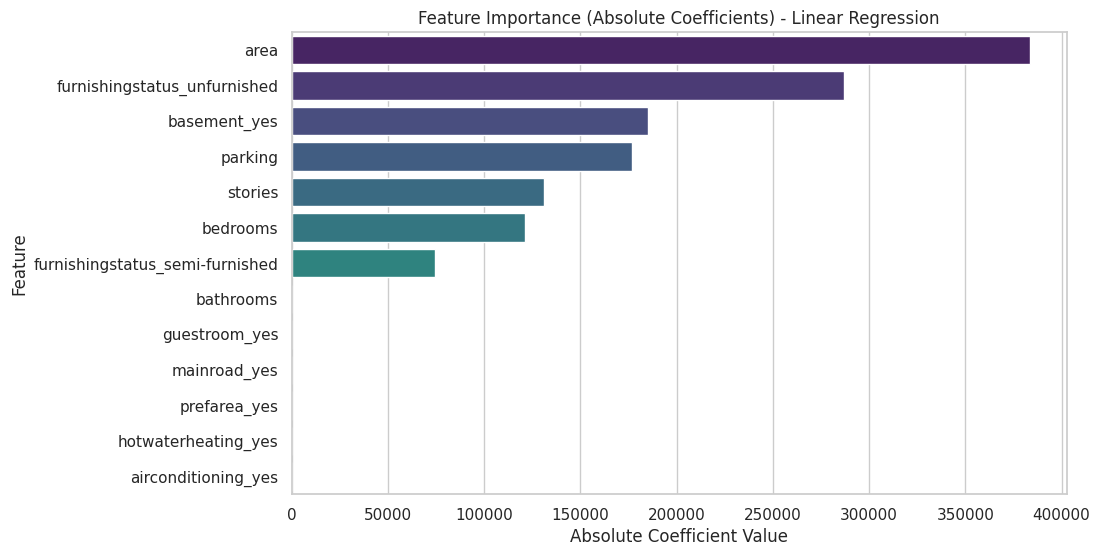

In [50]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# 5-Fold Cross-Validation (scoring by R²)
cv_scores = cross_val_score(lr, X_train_no_outliers, y_train_no_outliers, cv=5, scoring='r2')
print(f"Cross-Validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f}")

# Coefficient Importance Plot
coef_df = pd.DataFrame({
    'Feature': X_train_no_outliers.columns,
    'Coefficient': lr.coef_
})
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='AbsCoefficient', y='Feature', palette='viridis')
plt.title("Feature Importance (Absolute Coefficients) - Linear Regression")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.show()


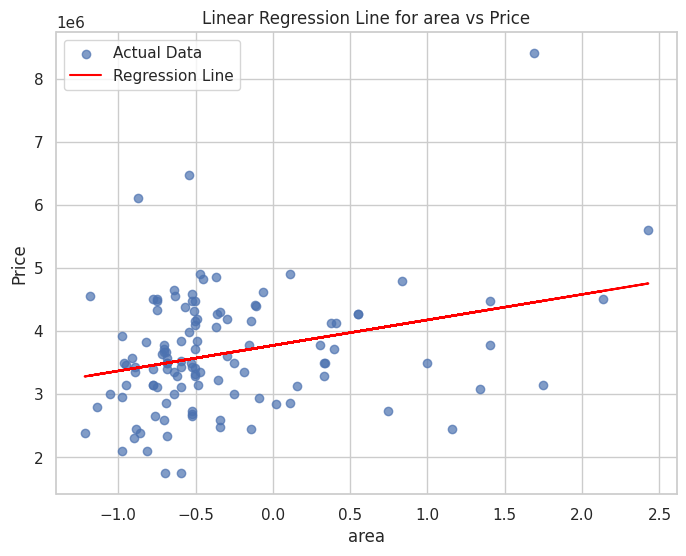

In [51]:
import numpy as np

# Choose a single feature for plotting regression line
feature = 'area'

plt.figure(figsize=(8,6))
plt.scatter(X_train_no_outliers[feature], y_train_no_outliers, alpha=0.7, label='Actual Data')
# Predict using only the chosen feature
X_feature = X_train_no_outliers[[feature]]
model_single = LinearRegression()
model_single.fit(X_feature, y_train_no_outliers)
y_line = model_single.predict(X_feature)

plt.plot(X_feature, y_line, color='red', label='Regression Line')
plt.xlabel(feature)
plt.ylabel("Price")
plt.title(f"Linear Regression Line for {feature} vs Price")
plt.legend()
plt.show()


In [52]:
# Interpret coefficients of the main LR model
for feat, coef in zip(X_train_no_outliers.columns, lr.coef_):
    if coef > 0:
        print(f"{feat}: Positive relationship — price increases by {coef:.2f} per unit increase.")
    elif coef < 0:
        print(f"{feat}: Negative relationship — price decreases by {abs(coef):.2f} per unit increase.")
    else:
        print(f"{feat}: No relationship with price.")


area: Positive relationship — price increases by 383431.71 per unit increase.
bedrooms: Positive relationship — price increases by 121484.09 per unit increase.
bathrooms: Negative relationship — price decreases by 0.00 per unit increase.
stories: Positive relationship — price increases by 131005.57 per unit increase.
parking: Positive relationship — price increases by 177025.66 per unit increase.
mainroad_yes: Negative relationship — price decreases by 0.00 per unit increase.
guestroom_yes: Positive relationship — price increases by 0.00 per unit increase.
basement_yes: Positive relationship — price increases by 184889.94 per unit increase.
hotwaterheating_yes: Negative relationship — price decreases by 0.00 per unit increase.
airconditioning_yes: No relationship with price.
prefarea_yes: Positive relationship — price increases by 0.00 per unit increase.
furnishingstatus_semi-furnished: Positive relationship — price increases by 74484.57 per unit increase.
furnishingstatus_unfurnished: